# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | formosa
Processing Record 4 of Set 1 | taoudenni
Processing Record 5 of Set 1 | tazovsky
Processing Record 6 of Set 1 | lloydminster
Processing Record 7 of Set 1 | benguela
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | kailua-kona
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | rongelap
Processing Record 19 of Set 1 | port augusta
Processing Record 20 of Set 1 | whakatane
Processing Record 21 of Set 1 | cartagena
Processing Record 22 of Set 1 | bi

Processing Record 36 of Set 4 | rio cuarto
Processing Record 37 of Set 4 | tamanrasset
Processing Record 38 of Set 4 | cedeira
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | novaya mayna
Processing Record 41 of Set 4 | guiglo
Processing Record 42 of Set 4 | calipatria
Processing Record 43 of Set 4 | longmen
Processing Record 44 of Set 4 | auki
Processing Record 45 of Set 4 | trevelin
Processing Record 46 of Set 4 | wewak
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | isangel
Processing Record 0 of Set 5 | ahmadnagar
Processing Record 1 of Set 5 | menongue
Processing Record 2 of Set 5 | bac lieu
Processing Record 3 of Set 5 | olyokminsk
Processing Record 4 of Set 5 | rio tuba
Processing Record 5 of Set 5 | sault ste. marie
Processing Record 6 of Set 5 | lhasa
Processing Record 7 of Set 5 | mineiros
Processing Record 8 of Set 5 | sinabang
Processing Record 9 of Set 5 | tevragh zeina
City not foun

Processing Record 29 of Set 8 | harstad
Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | klaksvik
Processing Record 32 of Set 8 | el bauga
Processing Record 33 of Set 8 | igarka
Processing Record 34 of Set 8 | aracataca
Processing Record 35 of Set 8 | san antonio del estrecho
City not found. Skipping...
Processing Record 36 of Set 8 | tatsinskiy
Processing Record 37 of Set 8 | lugoba
Processing Record 38 of Set 8 | comodoro rivadavia
Processing Record 39 of Set 8 | san borja
Processing Record 40 of Set 8 | palmares do sul
Processing Record 41 of Set 8 | kirando
Processing Record 42 of Set 8 | valle hermoso
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | soanierana ivongo
Processing Record 45 of Set 8 | taman rajawali
City not found. Skipping...
Processing Record 46 of Set 8 | teplice
Processing Record 47 of Set 8 | barra
Processing Record 48 of Set 8 | paso de los toros
Processing Record 49 of Set 8 | marka
Processing Record 0 of Set 9 | puer

Processing Record 15 of Set 12 | corner brook
Processing Record 16 of Set 12 | tavda
Processing Record 17 of Set 12 | paragominas
Processing Record 18 of Set 12 | kingston
Processing Record 19 of Set 12 | okhotsk
Processing Record 20 of Set 12 | tanumah
Processing Record 21 of Set 12 | belyy yar
Processing Record 22 of Set 12 | khanty-mansiysk
Processing Record 23 of Set 12 | antonio enes
Processing Record 24 of Set 12 | jackson
Processing Record 25 of Set 12 | yeed
Processing Record 26 of Set 12 | ras gharib
City not found. Skipping...
Processing Record 27 of Set 12 | kuta
Processing Record 28 of Set 12 | vrangel'
Processing Record 29 of Set 12 | polyarnyy
Processing Record 30 of Set 12 | ciudad insurgentes
Processing Record 31 of Set 12 | el nido
Processing Record 32 of Set 12 | grove
Processing Record 33 of Set 12 | princeville
Processing Record 34 of Set 12 | magong
Processing Record 35 of Set 12 | lata
Processing Record 36 of Set 12 | progreso
Processing Record 37 of Set 12 | taba

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,20.37,67,0,2.64,ZA,1701970466
1,edinburgh of the seven seas,-37.0676,-12.3116,15.03,81,100,7.93,SH,1701970466
2,formosa,-26.1775,-58.1781,24.99,96,100,5.14,AR,1701970466
3,taoudenni,22.6783,-3.9836,24.86,15,92,4.36,ML,1701970466
4,tazovsky,67.4667,78.7000,-24.86,97,90,5.00,RU,1701970467


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,20.37,67,0,2.64,ZA,1701970466
1,edinburgh of the seven seas,-37.0676,-12.3116,15.03,81,100,7.93,SH,1701970466
2,formosa,-26.1775,-58.1781,24.99,96,100,5.14,AR,1701970466
3,taoudenni,22.6783,-3.9836,24.86,15,92,4.36,ML,1701970466
4,tazovsky,67.4667,78.7000,-24.86,97,90,5.00,RU,1701970467


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

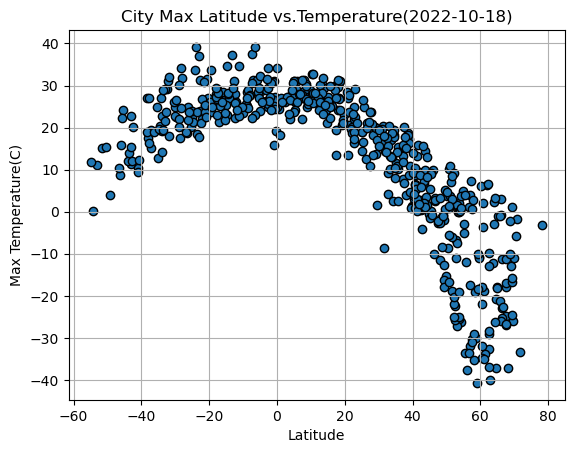

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs.Temperature(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

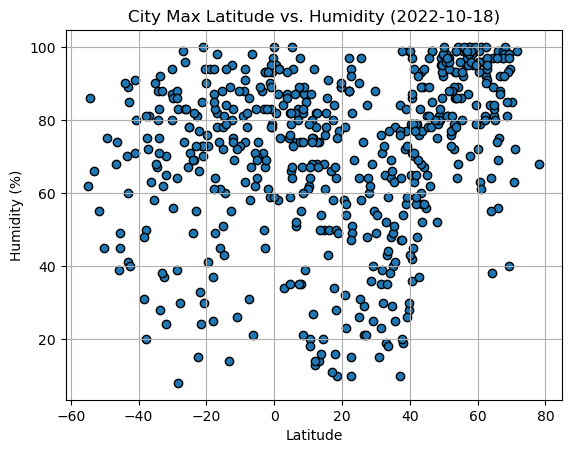

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

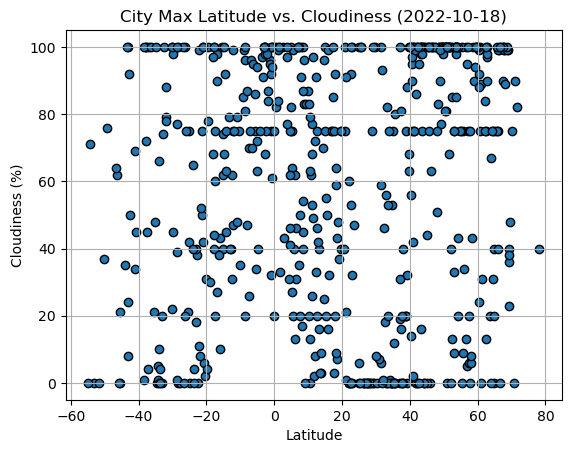

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

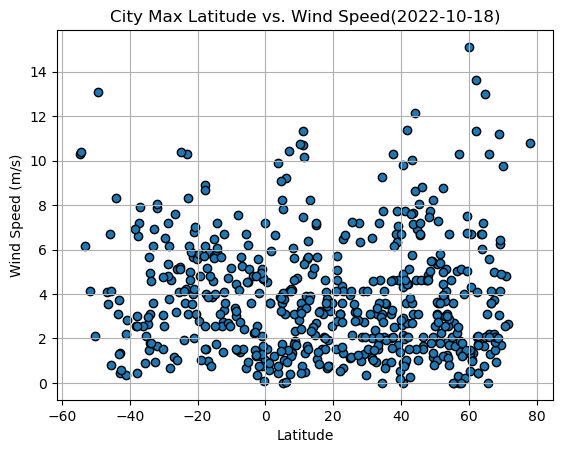

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,taoudenni,22.6783,-3.9836,24.86,15,92,4.36,ML,1701970466
4,tazovsky,67.4667,78.7000,-24.86,97,90,5.00,RU,1701970467
5,lloydminster,53.2835,-110.0016,1.12,86,100,5.14,CA,1701970322
7,bethel,41.3712,-73.4140,2.79,63,100,3.60,US,1701970386
8,kailua-kona,19.6406,-155.9956,23.06,89,75,3.60,US,1701970467


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,20.37,67,0,2.64,ZA,1701970466
1,edinburgh of the seven seas,-37.0676,-12.3116,15.03,81,100,7.93,SH,1701970466
2,formosa,-26.1775,-58.1781,24.99,96,100,5.14,AR,1701970466
6,benguela,-12.5763,13.4055,26.89,80,62,2.75,AO,1701970467
9,blackmans bay,-43.0167,147.3167,11.40,89,100,0.45,AU,1701970467


###  Temperature vs. Latitude Linear Regression Plot

ValueError: x and y must have same first dimension, but have shapes (386,) and (563,)

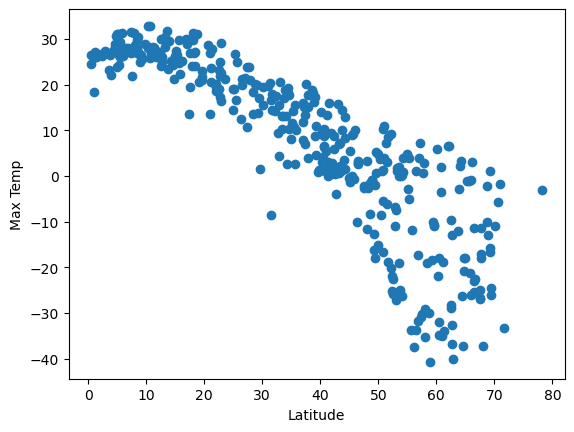

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values, y_values)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()


In [28]:
# Linear regression on Southern Hemisphere


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE